In [1]:
# WELCOME TO THE ALGORITHMS CLASS~~~

In [2]:
numbers = [1, 2, 3, 1]

In [3]:
numbers[0]

1

In [4]:
numbers[100]

IndexError: list index out of range

In [5]:
fruits = {'apple', 'banana'}

In [7]:
'apple' in fruits

True

In [9]:
numbers = [1]

In [10]:
# is_sorted(numbers) => False
def is_sorted(l):
    max_index = len(l) - 1
    for index in range(max_index):
        if l[index] > l[index + 1]:
            return False
    return True

is_sorted([1])

True

In [19]:
import copy

def bubble_sort(A):
    """Challenge: make it not mutate A"""
    c = copy.copy(A)
    
    n = len(A)
    
    while True:
        swapped = False
        
        for i in range(1, n):
            if c[i - 1] > c[i]:
                c[i - 1], c[i] = c[i], c[i - 1]
                swapped = True

        if not swapped:
            break

In [ ]:
https://github.com/razzius/PyClassLessons
or https://github.com/razzius/PyClassLessons/blob/master/course/pyclass-2017-10-15-algorithms.md

In [23]:
numbers = [3, 2, 1]
bubble_sort(numbers)
numbers

[1, 2, 3]

In [50]:
graph = {
    'return': {'wash', 'dry'},
    'wash': {'detergent'},
    'detergent': {'dry'},  # Note that {} would be an empty dict, not a set
    'dry': {'wash'}
}

In [42]:
# goal: ['detergent', 'wash', 'dry', 'return']
import copy
def toposort(g):
    g = copy.deepcopy(g)
    l = []
    s = {n for n in g if not g[n]}
    while s:
        n = s.pop()
        l.append(n)
        for m in {m for m in g if n in g[m]}:
            g[m].remove(n)
            
            if not g[m]:
                s.add(m)
    if any(g.values()):
        raise ValueError('no solution')
    else:
        return l

In [34]:
graph

{'detergent': set(),
 'dry': {'wash'},
 'return': {'dry', 'wash'},
 'wash': {'detergent'}}

In [51]:
toposort(graph)

ValueError: no solution

In [45]:
graph

{'detergent': set(),
 'dry': {'wash'},
 'return': {'dry', 'wash'},
 'wash': {'detergent'}}

In [46]:
circular = {
    'a': {'a'}
}

In [47]:
toposort(circular)

ValueError: no solution

In [49]:
any(circular.values())

True

In [61]:
states_text="""Alabama	Florida, Georgia, Mississippi, Tennessee
Alaska	None
Arizona	California, Colorado, Nevada, New Mexico, Utah
Arkansas	Louisiana, Mississippi, Missouri, Oklahoma, Tennessee, Texas
California	Arizona, Nevada, Oregon
Colorado	Arizona, Kansas, Nebraska, New Mexico, Oklahoma, Utah, Wyoming
Connecticut	Massachusetts, New York, Rhode Island
Delaware	Maryland, New Jersey, Pennsylvania
Florida	Alabama, Georgia
Georgia	Alabama, Florida, North Carolina, South Carolina, Tennessee
Hawaii	None
Idaho	Montana, Nevada, Oregon, Utah, Washington, Wyoming
Illinois	Indiana, Iowa, Michigan, Kentucky, Missouri, Wisconsin
Indiana	Illinois, Kentucky, Michigan, Ohio
Iowa	Illinois, Minnesota, Missouri, Nebraska, South Dakota, Wisconsin
Kansas	Colorado, Missouri, Nebraska, Oklahoma
Kentucky	Illinois, Indiana, Missouri, Ohio, Tennessee, Virginia, West Virginia
Louisiana	Arkansas, Mississippi, Texas
Maine	New Hampshire
Maryland	Delaware, Pennsylvania, Virginia, West Virginia
Massachusetts	Connecticut, New Hampshire, New York, Rhode Island, Vermont
Michigan	Illinois, Indiana, Minnesota (water border), Ohio, Wisconsin
Minnesota	Iowa, Michigan (water border), North Dakota, South Dakota, Wisconsin
Mississippi	Alabama, Arkansas, Louisiana, Tennessee
Missouri	Arkansas, Illinois, Iowa, Kansas, Kentucky, Nebraska, Oklahoma, Tennessee
Montana	Idaho, North Dakota, South Dakota, Wyoming
Nebraska	Colorado, Iowa, Kansas, Missouri, South Dakota, Wyoming
Nevada	Arizona, California, Idaho, Oregon, Utah
New Hampshire	Maine, Massachusetts, Vermont
New Jersey	Delaware, New York, Pennsylvania
New Mexico	Arizona, Colorado, Oklahoma, Texas, Utah
New York	Connecticut, Massachusetts, New Jersey, Pennsylvania, Rhode Island (water border), Vermont
North Carolina	Georgia, South Carolina, Tennessee, Virginia
North Dakota	Minnesota, Montana, South Dakota
Ohio	Indiana, Kentucky, Michigan, Pennsylvania, West Virginia
Oklahoma	Arkansas, Colorado, Kansas, Missouri, New Mexico, Texas
Oregon	California, Idaho, Nevada, Washington
Pennsylvania	Delaware, Maryland, New Jersey, New York, Ohio, West Virginia
Rhode Island	Connecticut, Massachusetts, New York (water border)
South Carolina	Georgia, North Carolina
South Dakota	Iowa, Minnesota, Montana, Nebraska, North Dakota, Wyoming
Tennessee	Alabama, Arkansas, Georgia, Kentucky, Mississippi, Missouri, North Carolina, Virginia
Texas	Arkansas, Louisiana, New Mexico, Oklahoma
Utah	Arizona, Colorado, Idaho, Nevada, New Mexico, Wyoming
Vermont	Massachusetts, New Hampshire, New York
Virginia	Kentucky, Maryland, North Carolina, Tennessee, West Virginia
Washington	Idaho, Oregon
West Virginia	Kentucky, Maryland, Ohio, Pennsylvania, Virginia
Wisconsin	Illinois, Iowa, Michigan, Minnesota
Wyoming	Colorado, Idaho, Montana, Nebraska, South Dakota, Utah"""

In [62]:
def build_graph():
    lines = states_text.split('\n')
    graph = {}
    for line in lines:
        state, bordering = line.split('\t')
        graph[state] = set(border for border in bordering.split(', ') if '(water border)' not in border)
    return graph

In [66]:
g = build_graph()

In [74]:
def dfs(start, g):
    queue = [start]
    visited = set()
    
    while queue:
        state = queue.pop()
        print('Visiting ' + state)
        visited.add(state)
        queue += g[state] - visited

    return visited

In [75]:
len(dfs('California', g))

Visiting California
Visiting Arizona
Visiting Utah
Visiting Colorado
Visiting Kansas
Visiting Nebraska
Visiting South Dakota
Visiting Iowa
Visiting Missouri
Visiting Oklahoma
Visiting Texas
Visiting Louisiana
Visiting Mississippi
Visiting Tennessee
Visiting Virginia
Visiting West Virginia
Visiting Kentucky
Visiting Indiana
Visiting Michigan
Visiting Wisconsin
Visiting Minnesota
Visiting North Dakota
Visiting Montana
Visiting Idaho
Visiting Nevada
Visiting Oregon
Visiting Washington
Visiting Washington
Visiting Oregon
Visiting Wyoming
Visiting Wyoming
Visiting Illinois
Visiting Illinois
Visiting Ohio
Visiting Pennsylvania
Visiting New York
Visiting Connecticut
Visiting Massachusetts
Visiting Rhode Island
Visiting New Hampshire
Visiting Maine
Visiting Vermont
Visiting Vermont
Visiting Rhode Island
Visiting Massachusetts
Visiting New Jersey
Visiting Delaware
Visiting Maryland
Visiting Vermont
Visiting New Jersey
Visiting Delaware
Visiting Maryland
Visiting Illinois
Visiting Ohio
Visiting 

48

In [76]:
def bfs(start, g):
    queue = [start]
    visited = set()
    
    while queue:
        state = queue.pop(0)
        print('Visiting ' + state)
        visited.add(state)
        queue += g[state] - visited

    return visited

In [77]:
import queue

In [78]:
import networkx

In [81]:
G = networkx.Graph(g)

In [84]:
networkx.draw(G, with_labels=True)

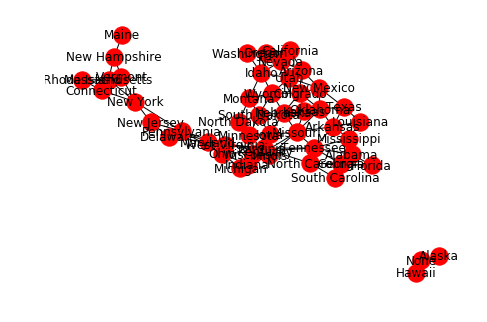

In [85]:
import matplotlib.pyplot as plt
plt.show()

In [98]:
list(networkx.traversal.depth_first_search.dfs_edges(G, 'California'))

[('California', 'Arizona'),
 ('Arizona', 'New Mexico'),
 ('New Mexico', 'Colorado'),
 ('Colorado', 'Wyoming'),
 ('Wyoming', 'Idaho'),
 ('Idaho', 'Oregon'),
 ('Oregon', 'Nevada'),
 ('Nevada', 'Utah'),
 ('Oregon', 'Washington'),
 ('Idaho', 'Montana'),
 ('Montana', 'North Dakota'),
 ('North Dakota', 'Minnesota'),
 ('Minnesota', 'Iowa'),
 ('Iowa', 'Illinois'),
 ('Illinois', 'Wisconsin'),
 ('Wisconsin', 'Michigan'),
 ('Michigan', 'Indiana'),
 ('Indiana', 'Ohio'),
 ('Ohio', 'Kentucky'),
 ('Kentucky', 'West Virginia'),
 ('West Virginia', 'Maryland'),
 ('Maryland', 'Delaware'),
 ('Delaware', 'Pennsylvania'),
 ('Pennsylvania', 'New Jersey'),
 ('New Jersey', 'New York'),
 ('New York', 'Connecticut'),
 ('Connecticut', 'Rhode Island'),
 ('Rhode Island', 'Massachusetts'),
 ('Massachusetts', 'Vermont'),
 ('Vermont', 'New Hampshire'),
 ('New Hampshire', 'Maine'),
 ('Maryland', 'Virginia'),
 ('Virginia', 'North Carolina'),
 ('North Carolina', 'Georgia'),
 ('Georgia', 'Alabama'),
 ('Alabama', 'Florida'

In [95]:
list(Out[94])

[('California', 'Arizona'),
 ('California', 'Nevada'),
 ('California', 'Oregon'),
 ('Arizona', 'New Mexico'),
 ('Arizona', 'Utah'),
 ('Arizona', 'Colorado'),
 ('Nevada', 'Idaho'),
 ('Oregon', 'Washington'),
 ('New Mexico', 'Texas'),
 ('New Mexico', 'Oklahoma'),
 ('Utah', 'Wyoming'),
 ('Colorado', 'Nebraska'),
 ('Colorado', 'Kansas'),
 ('Idaho', 'Montana'),
 ('Texas', 'Arkansas'),
 ('Texas', 'Louisiana'),
 ('Oklahoma', 'Missouri'),
 ('Wyoming', 'South Dakota'),
 ('Nebraska', 'Iowa'),
 ('Montana', 'North Dakota'),
 ('Arkansas', 'Mississippi'),
 ('Arkansas', 'Tennessee'),
 ('Missouri', 'Illinois'),
 ('Missouri', 'Kentucky'),
 ('South Dakota', 'Minnesota'),
 ('Iowa', 'Wisconsin'),
 ('Mississippi', 'Alabama'),
 ('Tennessee', 'Georgia'),
 ('Tennessee', 'North Carolina'),
 ('Tennessee', 'Virginia'),
 ('Illinois', 'Indiana'),
 ('Illinois', 'Michigan'),
 ('Kentucky', 'West Virginia'),
 ('Kentucky', 'Ohio'),
 ('Alabama', 'Florida'),
 ('Georgia', 'South Carolina'),
 ('Virginia', 'Maryland'),
 ('W